## 1. Rules

Consider the relation between order and cart

behavior_type = 3与 order behavior_type = 4 connection？

rule：in time T, the user will place order on items in the carts, the parameter T


## 2. Data Analysis

generate new data D_time = {<user_id, item_id, time_3, time_4>}

In [1]:
item_path = "/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/tianchi_fresh_comp_train_item.csv"
user_path = "/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/tianchi_fresh_comp_train_user.csv"

In [2]:
import os
import sys
import timeit
import pandas as pd

start_time = timeit.default_timer()

'''
generation of new data sets:
    df_act_34 = {<time, user_id, item_id, behavior_type = 3 or 4 >}
here we write .csv file multi-step to handle the large scale data.
'''

batch = 0
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H')
for df in pd.read_csv(open(user_path, 'r'), 
                      chunksize=100000): 
    try:
        df_act_34 = df[df['behavior_type'].isin([3,4])]     
        df_act_34.to_csv('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/act_34.csv',
                         columns=['time','user_id','item_id','behavior_type'],
                         index=False, header=False,
                         mode = 'a')
        batch += 1
        print('chunk %d done.' %batch) 
        
    except StopIteration:
        print("finish.")
        break 

chunk 1 done.
chunk 2 done.
chunk 3 done.
chunk 4 done.
chunk 5 done.
chunk 6 done.
chunk 7 done.
chunk 8 done.
chunk 9 done.
chunk 10 done.
chunk 11 done.
chunk 12 done.
chunk 13 done.
chunk 14 done.
chunk 15 done.
chunk 16 done.
chunk 17 done.
chunk 18 done.
chunk 19 done.
chunk 20 done.
chunk 21 done.
chunk 22 done.
chunk 23 done.
chunk 24 done.
chunk 25 done.
chunk 26 done.
chunk 27 done.
chunk 28 done.
chunk 29 done.
chunk 30 done.
chunk 31 done.
chunk 32 done.
chunk 33 done.
chunk 34 done.
chunk 35 done.
chunk 36 done.
chunk 37 done.
chunk 38 done.
chunk 39 done.
chunk 40 done.
chunk 41 done.
chunk 42 done.
chunk 43 done.
chunk 44 done.
chunk 45 done.
chunk 46 done.
chunk 47 done.
chunk 48 done.
chunk 49 done.
chunk 50 done.
chunk 51 done.
chunk 52 done.
chunk 53 done.
chunk 54 done.
chunk 55 done.
chunk 56 done.
chunk 57 done.
chunk 58 done.
chunk 59 done.
chunk 60 done.
chunk 61 done.
chunk 62 done.
chunk 63 done.
chunk 64 done.
chunk 65 done.
chunk 66 done.
chunk 67 done.
chun

generate datasets

In [6]:
df_act_34.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 23200000 to 23290546
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        3834 non-null   int64         
 1   item_id        3834 non-null   int64         
 2   behavior_type  3834 non-null   int64         
 3   user_geohash   771 non-null    object        
 4   item_category  3834 non-null   int64         
 5   time           3834 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 209.7+ KB


In [5]:
df_act_34.time = pd.to_datetime(df_act_34.time, format='%Y-%m-%d %H')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df_act_34 = df_act_34.drop_duplicates(['user_id','item_id','behavior_type']) 

In [9]:
df_act_34.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
23200000,64357551,55214220,4,NaN,4561,2014-12-04 13:00:00
23200011,64357551,99730977,3,NaN,10431,2014-11-29 14:00:00
23200020,64357551,65084559,3,NaN,10431,2014-11-28 23:00:00
23200026,64357551,239918195,4,NaN,10015,2014-12-15 14:00:00
23200028,64357551,332206396,3,NaN,10431,2014-11-29 23:00:00


In [10]:
df_time_3 = df_act_34[df_act_34['behavior_type'].isin([3])][['user_id','item_id','time']]
df_time_4 = df_act_34[df_act_34['behavior_type'].isin([4])][['user_id','item_id','time']]

In [11]:
df_time_3.head()

,user_id,item_id,time
23200011,64357551,99730977,2014-11-29 14:00:00
23200020,64357551,65084559,2014-11-28 23:00:00
23200028,64357551,332206396,2014-11-29 23:00:00
23200059,64357551,376402730,2014-12-13 01:00:00
23200071,64357551,371658412,2014-12-12 12:00:00


In [12]:
df_time_3.columns = ['user_id', 'item_id', 'time3']
df_time_4.columns = ['user_id','item_id', 'time4']

In [13]:
del df_act_34  # to save memory

In [15]:
df_time = pd.merge(df_time_3,df_time_4,on=['user_id','item_id'],how='outer')

In [16]:
df_time.head()

,user_id,item_id,time3,time4
0,64357551,99730977,2014-11-29 14:00:00,NaT
1,64357551,65084559,2014-11-28 23:00:00,NaT
2,64357551,332206396,2014-11-29 23:00:00,NaT
3,64357551,376402730,2014-12-13 01:00:00,NaT
4,64357551,371658412,2014-12-12 12:00:00,2014-12-12 12:00:00


In [17]:
df_time_34 = df_time.dropna()

In [18]:
df_time_3 = df_time[df_time['time4'].isnull()].drop(['time4'], axis=1)

In [19]:
df_time_3 = df_time_3.dropna()

In [20]:
df_time_34.head()

,user_id,item_id,time3,time4
4,64357551,371658412,2014-12-12 12:00:00,2014-12-12 12:00:00
5,64357551,75214044,2014-12-15 12:00:00,2014-12-15 12:00:00
17,64377777,38767010,2014-11-20 21:00:00,2014-11-29 20:00:00
20,64377777,378421486,2014-12-10 12:00:00,2014-12-10 12:00:00
28,64377777,110126975,2014-12-11 19:00:00,2014-12-11 19:00:00


In [21]:
df_time_3.head()

,user_id,item_id,time3
0,64357551,99730977,2014-11-29 14:00:00
1,64357551,65084559,2014-11-28 23:00:00
2,64357551,332206396,2014-11-29 23:00:00
3,64357551,376402730,2014-12-13 01:00:00
6,64357551,21882301,2014-11-28 23:00:00


In [22]:
df_time_3.to_csv('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/time_3.csv',
                  columns=['user_id','item_id','time3'],
                  index=False)

# save middle data set
df_time_34.to_csv('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/time_34.csv',
                  columns=['user_id','item_id','time3', 'time4'],
                  index=False)

Data Viz

In [23]:
df_time_34['time3']

4      2014-12-12 12:00:00
5      2014-12-15 12:00:00
17     2014-11-20 21:00:00
20     2014-12-10 12:00:00
28     2014-12-11 19:00:00
               ...        
2017   2014-11-30 16:00:00
2019   2014-11-30 16:00:00
2021   2014-11-19 19:00:00
2025   2014-11-30 16:00:00
2027   2014-11-23 19:00:00
Name: time3, Length: 588, dtype: datetime64[ns]

In [25]:
df_time_34['time4'] - df_time_34['time3']

4      0 days 00:00:00
5      0 days 00:00:00
17     8 days 23:00:00
20     0 days 00:00:00
28     0 days 00:00:00
             ...      
2017   0 days 00:00:00
2019   0 days 01:00:00
2021   1 days 14:00:00
2025   0 days 00:00:00
2027   6 days 21:00:00
Length: 588, dtype: timedelta64[ns]

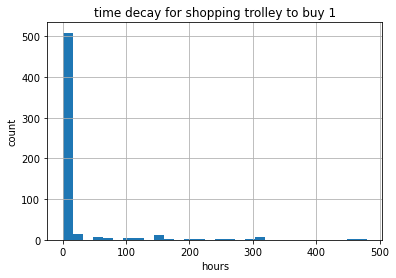

In [27]:
'''
for decay time calculation and visualization 
'''
data_file = open('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/time_34.csv', 'r')
try:
    df_time_34 = pd.read_csv(data_file, 
                             parse_dates = ['time3', 'time4'],
                             index_col = False)
finally:
    data_file.close()
    
delta_time = df_time_34['time4']-df_time_34['time3']
delta_hour = [] 
for i in range(len(delta_time)):
    d_hour = delta_time[i].days*24+delta_time[i]._h
    if d_hour < 0: continue     # clean invalid result
    else: delta_hour.append(d_hour)

# draw the histogram of delta_hour
import matplotlib.pyplot as plt
f1 = plt.figure(1)
plt.hist(delta_hour, 30)
plt.xlabel('hours')
plt.ylabel('count')
plt.title('time decay for shopping trolley to buy 1')
plt.grid(True)
plt.show()


## 3.Prediction

In [29]:
data_file = open('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/time_3.csv', 'r')
try:
    df_time_3 = pd.read_csv(data_file, 
                            parse_dates = ['time3'],
                            index_col = ['time3'])
finally:
    data_file.close()
    
ui_pred = df_time_3.loc['2014-12-18']  

# generate from P
data_file = open(item_path, 'r')
try:
    df_item = pd.read_csv(data_file,index_col = False)
finally:
    data_file.close()

ui_pred_in_P = pd.merge(ui_pred,df_item,on = ['item_id'])  

# user_id - item_id to csv file
ui_pred_in_P.to_csv('/Users/DanDan/Desktop/第一课/code/fresh_comp_offline/tianchi_mobile_recommendation_predict.csv',
                    columns=['user_id','item_id'],
                    index=False)

end_time = timeit.default_timer()
print(('The code for file ' + os.path.split(item_path)[1] +
       ' ran for %.2fm' % ((end_time - start_time) / 60.)), file = sys.stderr)

The code for file tianchi_fresh_comp_train_item.csv ran for 16.30m


## 4. Tianchi Submission

提交文件 tianchi_mobile_recommendation_predict.csv 到天池比赛的网站

https://tianchi.aliyun.com/competition/entrance/231522/introduction

需要登录



之后可以看到还可以的分数